# Test plotting notebook

In [84]:
import pypsa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [85]:
n = pypsa.Network('results/postnetworks/elec_s_37_lvopt___2050.nc')
folder_path = 'results/csvs'
# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
# Initialize an empty dictionary to store dataframes
dataframes = {}
# Loop through the CSV files and load each into a dataframe
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    # Use the filename without extension as the key
    key = os.path.splitext(file)[0]
    dataframes[key] = df
for key, df in dataframes.items():
    # Drop the first 4 rows from the dataframe
    updated_df = df.drop(df.index[0:4])
    # Update the dataframe in the dictionary
    dataframes[key] = updated_df

INFO:pypsa.io:Imported network elec_s_37_lvopt___2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, shapes, storage_units, stores


In [ ]:
buses = n.buses
buses

In [ ]:
# display the time series of the load of the buses
n.buses_t

In [ ]:
lines = n.lines
lines

In [ ]:
loads = n.loads
loads

In [ ]:
biomass_generators = n.generators[n.generators.carrier.str.contains('biomass',case=False,na=False)].index
biomass_generators
#there are none

In [ ]:
biomass_stores = n.stores[n.stores.carrier.str.contains('biomass',case=False,na=False)]
biomass_stores

In [ ]:
stores = n.stores
stores

In [ ]:
storage_units = n.storage_units
storage_units

In [ ]:
biomass_storage_units = n.storage_units[n.storage_units.carrier.str.contains('biomass',case=False,na=False)]
biomass_storage_units

In [ ]:
links = n.links
links

In [ ]:
biomass_links = n.links[n.links.carrier.str.contains('biomass',case=False,na=False)]
biogas_links = n.links[n.links.carrier.str.contains('biogas',case=False,na=False)]
biogas_links

In [ ]:
loads = n.loads
loads

In [ ]:
biomass_loads = n.loads[n.loads.carrier.str.contains('biomass',case=False,na=False)]
biomass_loads

In [ ]:
biogas_loads = n.loads[n.loads.carrier.str.contains('biogas',case=False,na=False)]
biogas_loads

Total available energy: 1185.64 TWh
Total used energy: 1185.64 TWh


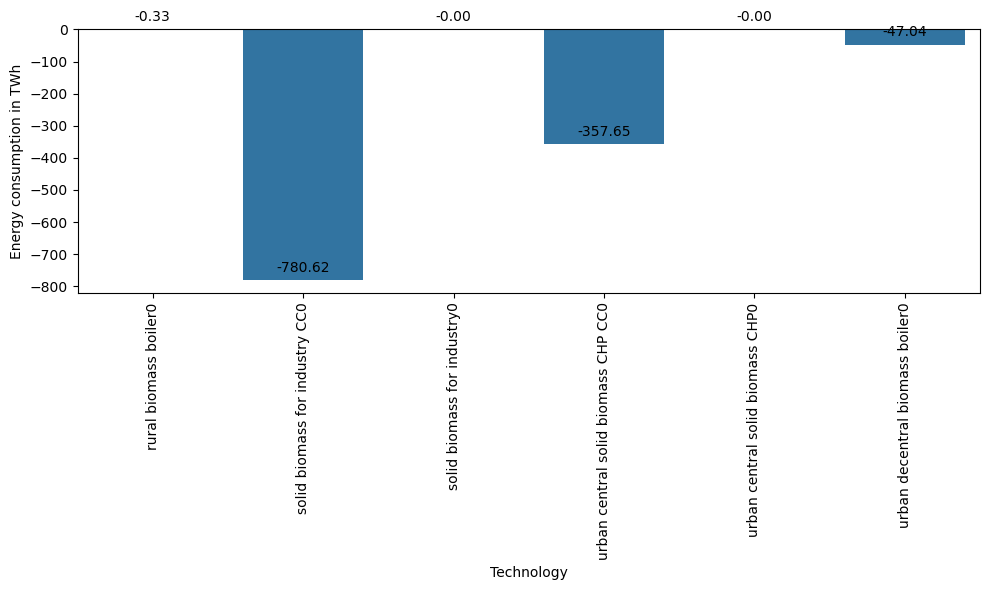

In [109]:

# Assuming 'biomass' DataFrame exists and you want to set or update its headers
bioenergy_supply = dataframes['supply_energy']
bioenergy_supply = bioenergy_supply[bioenergy_supply.iloc[:, 2].str.contains("biomass|biogas", na=False)].reset_index(drop=True)
biomass = bioenergy_supply[bioenergy_supply.iloc[:, 0] == 'solid biomass'].reset_index(drop=True)
biomass.columns = ['Carrier', 'Category', 'Name', 'Value']

#make to float and divide value by 1 000 000 to get TWh
biomass['Value'] = biomass['Value'].astype(float) / 1000000

# Now, when you filter 'biomass' into 'stores' and 'links', they will inherit these column names
stores = biomass[biomass['Category'] == 'stores']
links = biomass[biomass['Category'] == 'links'].copy()  # Use .copy() to avoid SettingWithCopyWarning

total_available_energy = stores['Value'].sum()
total_used_energy = links['Value'].sum()
print(f'Total available energy: {total_available_energy:.2f} TWh')
print(f'Total used energy: {-1* total_used_energy:.2f} TWh')

# Ensure 'Value' is numeric for aggregation, using .loc to avoid SettingWithCopyWarning
links.loc[:, 'Value'] = pd.to_numeric(links['Value'], errors='coerce')

# Create a bar plot with 'Name' as the x-axis and 'Value' for the y-axis
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Name', y='Value', data=links, errorbar=None)  # Use errorbar=None instead of ci=None

plt.xlabel('Technology')  # Label for the x-axis
plt.ylabel('Energy consumption in TWh')  # Label for the y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Adding the text on the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.tight_layout()  # Adjust layout to make room for the plot